In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Cyber Security Tweets | Elyse 

In [ ]:
data = pd.read_csv('cybersecurity_tweets.csv')

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [ ]:
cyber = df[["text"]]
pd.set_option('display.max_colwidth', -1)
cyber.head()

## Cleaning Data

In [ ]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words()]
    return " ".join(txt_lst)

In [ ]:
cyber['text'] = cyber['text'].apply(cleanTxt)
cyber.head()

In [11]:
cs_words = []

for row in cyber['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words

['signs',
 'causes',
 'solutions',
 'network',
 'data',
 'breaches',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'battling',
 'chinese',
 'big',
 'tech',
 'encroachment',
 'india',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'ask',
 'dr',
 'jeanette',
 'success',
 'the',
 'way',
 'devil',
 'a',
 'choke',
 'chain',
 'gonna',
 'quick',
 'gonna',
 'sure',
 'gonna',
 'final',
 '',
 'los',
 'angeles',
 'sentinel',
 '',
 'los',
 'angeles',
 'sentinel',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'cyber',
 'threats',
 'digital',
 'pakistan',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'pakistan',
 'cyber',
 'attack',
 'news',
 'pakistan',
 'army',
 'claims',
 'major',
 'cyber',
 'attack',
 'indian',
 'intel',
 '',
 'world',
 'news',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'reimagining',
 'cyber',
 'conflict',
 'prospects',
 'a',
 'tech',
 'cold',
 'war',
 '',
 'cybersecurity',
 '\xa0cyberattack',
 '',
 'jill',
 'biden',
 'meets',
 'uk',
 'military',
 'veterans',
 

In [ ]:
cs_words = [word for word in cs_words if word not in stopwords.words()]

In [ ]:
cs_words = [word for word in cs_words if word != '']

In [ ]:
cs_words = [word for word in cs_words if word != '\r\n\r\n'] # indicates space and indexing

In [ ]:
cs_words = [word for word in cs_words if word != 'u0001f449'] # indicates back hand emoji pointing right

In [ ]:
cs_words

## Small Analysis

In [93]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'cybersecurity': 8037, 'security': 6279, 'the': 4985, 'cyber': 4459, 'a': 2211, 'data': 1568, 'new': 1557, 'infosec': 1346, 'ransomware': 1330, 'amp': 1198, ...})

In [94]:
fdist.most_common(10)

[('cybersecurity', 8037),
 ('security', 6279),
 ('the', 4985),
 ('cyber', 4459),
 ('a', 2211),
 ('data', 1568),
 ('new', 1557),
 ('infosec', 1346),
 ('ransomware', 1330),
 ('amp', 1198)]

In [95]:
len(fdist)

32659

In [96]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))
freq_data

,0,1
0,cybersecurity,8037
1,security,6279
2,the,4985
3,cyber,4459
4,a,2211
5,data,1568
6,new,1557
7,infosec,1346
8,ransomware,1330
9,amp,1198


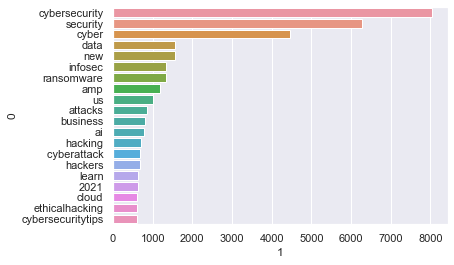

In [74]:
sns.barplot(data = freq_data, x = 1, y = 0);